In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import Model

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Essential info about tagged entities:
```
geo = Geographical Entity
org = Organization
per = Person
gpe = Geopolitical Entity
tim = Time indicator
art = Artifact
eve = Event
nat = Natural Phenomenon
```

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Named Entity Recognition/ner_dataset.csv", encoding="latin1")

In [6]:
data.head(50)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
5,NaN,through,IN,O
6,NaN,London,NNP,B-geo
7,NaN,to,TO,O
8,NaN,protest,VB,O
9,NaN,the,DT,O


In [7]:
data = data.fillna(method="ffill")

In [8]:
data.head(50)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [9]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 35178
Unique tags in corpus: 17


In [10]:
words=list(data['Word'].unique())
words.append("ENDPAD")
tags=list(data['Tag'].unique())

In [11]:
print("Unique tags are:", tags)

Unique tags are: ['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim', 'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve', 'I-eve', 'I-nat']


In [12]:
print("Unique words are:", words)

Unique words are: ['Thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'London', 'to', 'protest', 'the', 'war', 'in', 'Iraq', 'and', 'demand', 'withdrawal', 'British', 'troops', 'from', 'that', 'country', '.', 'Families', 'soldiers', 'killed', 'conflict', 'joined', 'protesters', 'who', 'carried', 'banners', 'with', 'such', 'slogans', 'as', '"', 'Bush', 'Number', 'One', 'Terrorist', 'Stop', 'Bombings', 'They', 'Houses', 'Parliament', 'a', 'rally', 'Hyde', 'Park', 'Police', 'put', 'number', 'marchers', 'at', '10,000', 'while', 'organizers', 'claimed', 'it', 'was', '1,00,000', 'The', 'comes', 'on', 'eve', 'annual', 'conference', 'Britain', "'s", 'ruling', 'Labor', 'Party', 'southern', 'English', 'seaside', 'resort', 'Brighton', 'party', 'is', 'divided', 'over', 'participation', 'continued', 'deployment', '8,500', 'march', 'came', 'ahead', 'anti-war', 'protests', 'today', 'other', 'cities', ',', 'including', 'Rome', 'Paris', 'Madrid', 'International', 'Atomic', 'Energy', 'Age

In [13]:
num_words = len(words)
num_tags = len(tags)

In [14]:
num_words

35179

In [15]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [16]:
getter = SentenceGetter(data)
sentences = getter.sentences

In [17]:
len(sentences)

47959

In [18]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [46]:
sentences[1]

[('Iranian', 'JJ', 'B-gpe'),
 ('officials', 'NNS', 'O'),
 ('say', 'VBP', 'O'),
 ('they', 'PRP', 'O'),
 ('expect', 'VBP', 'O'),
 ('to', 'TO', 'O'),
 ('get', 'VB', 'O'),
 ('access', 'NN', 'O'),
 ('to', 'TO', 'O'),
 ('sealed', 'JJ', 'O'),
 ('sensitive', 'JJ', 'O'),
 ('parts', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('plant', 'NN', 'O'),
 ('Wednesday', 'NNP', 'B-tim'),
 (',', ',', 'O'),
 ('after', 'IN', 'O'),
 ('an', 'DT', 'O'),
 ('IAEA', 'NNP', 'B-org'),
 ('surveillance', 'NN', 'O'),
 ('system', 'NN', 'O'),
 ('begins', 'VBZ', 'O'),
 ('functioning', 'VBG', 'O'),
 ('.', '.', 'O')]

In [19]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [20]:
word2idx

{'Thousands': 1,
 'of': 2,
 'demonstrators': 3,
 'have': 4,
 'marched': 5,
 'through': 6,
 'London': 7,
 'to': 8,
 'protest': 9,
 'the': 10,
 'war': 11,
 'in': 12,
 'Iraq': 13,
 'and': 14,
 'demand': 15,
 'withdrawal': 16,
 'British': 17,
 'troops': 18,
 'from': 19,
 'that': 20,
 'country': 21,
 '.': 22,
 'Families': 23,
 'soldiers': 24,
 'killed': 25,
 'conflict': 26,
 'joined': 27,
 'protesters': 28,
 'who': 29,
 'carried': 30,
 'banners': 31,
 'with': 32,
 'such': 33,
 'slogans': 34,
 'as': 35,
 '"': 36,
 'Bush': 37,
 'Number': 38,
 'One': 39,
 'Terrorist': 40,
 'Stop': 41,
 'Bombings': 42,
 'They': 43,
 'Houses': 44,
 'Parliament': 45,
 'a': 46,
 'rally': 47,
 'Hyde': 48,
 'Park': 49,
 'Police': 50,
 'put': 51,
 'number': 52,
 'marchers': 53,
 'at': 54,
 '10,000': 55,
 'while': 56,
 'organizers': 57,
 'claimed': 58,
 'it': 59,
 'was': 60,
 '1,00,000': 61,
 'The': 62,
 'comes': 63,
 'on': 64,
 'eve': 65,
 'annual': 66,
 'conference': 67,
 'Britain': 68,
 "'s": 69,
 'ruling': 70,
 'L

In [47]:
tag2idx

{'O': 0,
 'B-geo': 1,
 'B-gpe': 2,
 'B-per': 3,
 'I-geo': 4,
 'B-org': 5,
 'I-org': 6,
 'B-tim': 7,
 'B-art': 8,
 'I-art': 9,
 'I-per': 10,
 'I-gpe': 11,
 'I-tim': 12,
 'B-nat': 13,
 'B-eve': 14,
 'I-eve': 15,
 'I-nat': 16}

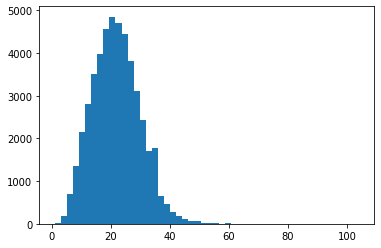

In [21]:
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [22]:
X1 = [[word2idx[w[0]] for w in s] for s in sentences]

In [54]:
len(X1)

47959

In [50]:
np.sum(X1)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 10,
 16,
 2,
 17,
 18,
 19,
 20,
 21,
 22,
 125,
 126,
 127,
 128,
 129,
 8,
 130,
 131,
 8,
 132,
 133,
 119,
 2,
 10,
 124,
 108,
 94,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 22,
 943,
 944,
 364,
 945,
 345,
 946,
 12,
 10,
 947,
 249,
 201,
 94,
 252,
 318,
 948,
 194,
 181,
 949,
 8,
 4,
 333,
 8,
 950,
 135,
 377,
 306,
 312,
 12,
 951,
 544,
 545,
 22,
 43,
 847,
 134,
 46,
 4646,
 4647,
 4648,
 32,
 1879,
 353,
 22,
 155,
 837,
 1189,
 7564,
 9399,
 173,
 351,
 94,
 150,
 94,
 841,
 14,
 706,
 306,
 829,
 181,
 16290,
 244,
 1541,
 14,
 2476,
 8,
 2334,
 3779,
 2,
 814,
 4069,
 338,
 20,
 3542,
 12202,
 518,
 274,
 2603,
 22,
 817,
 9399,
 173,
 10,
 1078,
 7442,
 1210,
 3739,
 255,
 325,
 181,
 12,
 759,
 2,
 1541,
 3788,
 251,
 32,
 10,
 759,
 16291,
 12,
 863,
 94,
 1545,
 1546,
 94,
 10,
 1544,
 14,
 2569,
 22,
 596,
 173,
 323,
 117,
 69,
 1524,
 14,
 10,
 3606,
 8063,
 3898,
 20,
 2434,
 59,
 152,
 6187

In [23]:
type(X1[0])

list

In [24]:
X1[0]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 10,
 16,
 2,
 17,
 18,
 19,
 20,
 21,
 22]

In [25]:
max_len = 50

# **pad_sequences example**

In [26]:
nums = [[1], [2, 3], [4, 5, 6]]
sequence.pad_sequences(nums)

array([[0, 0, 1],
       [0, 2, 3],
       [4, 5, 6]], dtype=int32)

In [27]:
nums = [[1], [2, 3], [4, 5, 6]]
sequence.pad_sequences(nums,maxlen=2)

array([[0, 1],
       [2, 3],
       [5, 6]], dtype=int32)

In [48]:
x1.sum()

NameError: ignored

In [28]:
X = sequence.pad_sequences(maxlen=max_len,
                  sequences=X1, padding="post",
                  value=num_words-1)

In [29]:
X[0]

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    10,    16,     2,
          17,    18,    19,    20,    21,    22, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178], dtype=int32)

In [30]:
y1 = [[tag2idx[w[2]] for w in s] for s in sentences]

In [31]:
y = sequence.pad_sequences(maxlen=max_len,
                  sequences=y1,
                  padding="post",
                  value=tag2idx["O"])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=1)

In [33]:
X_train[0]

array([  596,  3837,  4197,    10,  7870,   251,  1071,     8,  2233,
           2,   667,    69,  5117,    14,    10,   450, 11085,   880,
         881,   183,    12,   667,    22, 35178, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178], dtype=int32)

In [34]:
y_train[0]

array([0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 5, 6, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [35]:
from tensorflow.keras import Model,Input
from tensorflow.keras.layers import LSTM,Embedding,Dense
from tensorflow.keras.layers import TimeDistributed,SpatialDropout1D,Bidirectional

In [36]:
input_word = Input(shape=(max_len, ))
model = Embedding(input_dim = num_words, output_dim = max_len, input_length = max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation='softmax'))(model)
model = Model(input_word, out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            1758950   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 50)           0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 50, 200)          120800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 50, 17)           3417      
 ibuted)                                                         
                                                             

In [37]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            1758950   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 50)           0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 50, 200)          120800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 50, 17)           3417      
 ibuted)                                                         
                                                             

In [40]:
# Write your code here
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [41]:
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test,y_test),
    batch_size=32, 
    epochs=3,
)

Epoch 1/3
1199/1199 [==============================] - 156s 127ms/step - loss: 0.1725 - accuracy: 0.9604 - val_loss: 0.0636 - val_accuracy: 0.9818
Epoch 2/3
1199/1199 [==============================] - 152s 126ms/step - loss: 0.0495 - accuracy: 0.9853 - val_loss: 0.0514 - val_accuracy: 0.9848
Epoch 3/3
1199/1199 [==============================] - 152s 127ms/step - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.0482 - val_accuracy: 0.9855


In [42]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.172547,0.960381,0.063649,0.981827
1,0.049481,0.985312,0.051417,0.984825
2,0.036764,0.988654,0.048190,0.985528


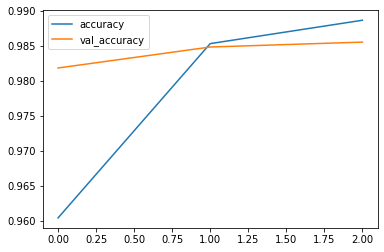

In [43]:
metrics[['accuracy','val_accuracy']].plot()

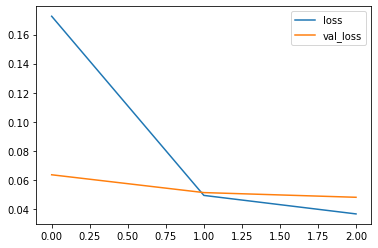

In [44]:
metrics[['loss','val_loss']].plot()

In [45]:
i = 20
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(X_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

1/1 [==============================] - 1s 551ms/step
Word           True 	 Pred

------------------------------
The            O	O
Bush           B-per	B-per
administration O	O
has            O	O
cited          O	O
the            O	O
material       O	O
as             O	O
evidence       O	O
that           O	O
Iran           B-geo	B-geo
is             O	O
trying         O	O
to             O	O
produce        O	O
highly         O	O
enriched       O	O
uranium        O	O
needed         O	O
for            O	O
nuclear        O	O
weapons        O	O
.              O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	